## Clustering
In this notebook, we will take the data frame prepared with ~60 clinically relevant variables (generated in data_cleaning_trial_patients_vn notebook) and attempt to perform UMAP, then HDBSCAN to try to identify meaningful clusters, from which we can proceed to survival analysis

In [1]:
import pandas as pd
import umap
import hdbscan
import matplotlib.pyplot as plt

In [2]:
#Load dataset generated previously
df = pd.read_csv("../outputs/final_df_for_analysis.csv")

In [3]:
df.head(2)

,PatientID,PrimarySite_lower,SmokingStatus,Surgery,days_diagnosis_to_adv,age,ecog_newly_gte2,bmi_index,percent_change_weight,hypotension,...,neutrophil_max,neutrophil_min,lymphocyte,lymphocyte_max,lymphocyte_min,stage_0_III,stage_IV,pdl1,fgfr,ecog_2+
0,F0016E985D839,0,1,1,0.0,80,0,20.557003,0.433996,0,...,5.4000,3.3,1.6,2.4,1.6,0,1,0,0,1
1,F001E5D4C6FA0,1,1,1,274.0,77,0,26.080805,-0.980341,0,...,6.3945,4.8,2.4,2.9,2.4,0,0,0,0,0


In [4]:
X = df.drop(columns=['PatientID'])

In [5]:
umap_model = umap.UMAP(n_components=15, n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = umap_model.fit_transform(X)

/Users/viveknimgaonkar/Documents/GitHub/TrialRescue/myenv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/viveknimgaonkar/Documents/GitHub/TrialRescue/myenv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


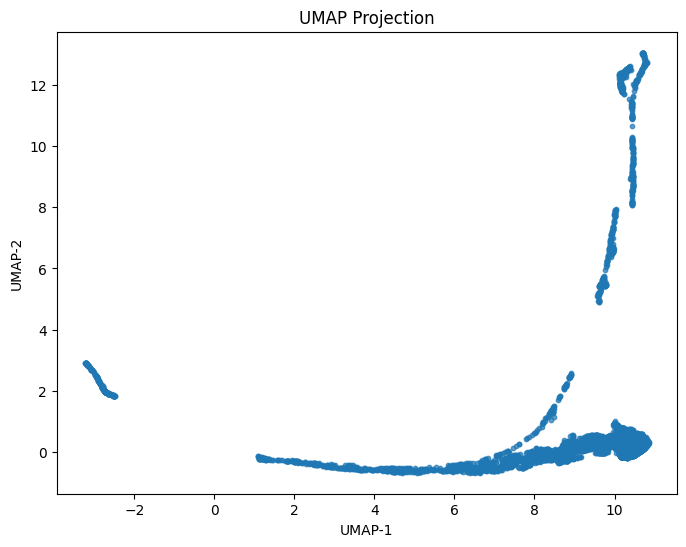

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], s=10, alpha=0.7)
plt.title('UMAP Projection')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.show()

In [11]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
labels = clusterer.fit_predict(X_umap)

/Users/viveknimgaonkar/Documents/GitHub/TrialRescue/myenv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/viveknimgaonkar/Documents/GitHub/TrialRescue/myenv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [12]:
df['cluster'] = labels

In [13]:
print(df[['cluster']].value_counts())

cluster
 24        2745
 8         2597
 1          184
 2          180
-1          150
 7           68
 27          42
 0           35
 3           34
 6           30
 21          29
 18          29
 28          28
 17          26
 9           25
 11          23
 19          22
 13          22
 26          20
 23          19
 16          18
 12          17
 25          17
 4           16
 20          16
 14          15
 5           14
 22          14
 10          14
 15          12
Name: count, dtype: int64


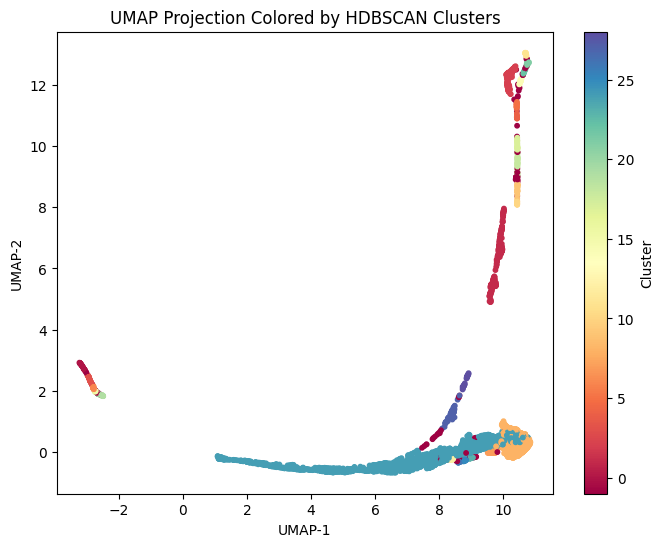

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels, cmap='Spectral', s=10)
plt.title('UMAP Projection Colored by HDBSCAN Clusters')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.colorbar(label='Cluster')
plt.savefig("../outputs/umap_hdbscan_clusters.png", dpi=300, bbox_inches='tight')
plt.show()

In [15]:
df.head(2)

,PatientID,PrimarySite_lower,SmokingStatus,Surgery,days_diagnosis_to_adv,age,ecog_newly_gte2,bmi_index,percent_change_weight,hypotension,...,neutrophil_min,lymphocyte,lymphocyte_max,lymphocyte_min,stage_0_III,stage_IV,pdl1,fgfr,ecog_2+,cluster
0,F0016E985D839,0,1,1,0.0,80,0,20.557003,0.433996,0,...,3.3,1.6,2.4,1.6,0,1,0,0,1,8
1,F001E5D4C6FA0,1,1,1,274.0,77,0,26.080805,-0.980341,0,...,4.8,2.4,2.9,2.4,0,0,0,0,0,24


In [16]:
df.to_csv('../outputs/df_with_clusters.csv', index = False)
# Save dtypes
df.dtypes.apply(lambda x: x.name).to_csv('../outputs/df_clusters_dtypes.csv')

## Repeating analysis with larger min cluster
One could also repeat the analysis with larger minimum cluster size

In [17]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=100)
labels = clusterer.fit_predict(X_umap)

/Users/viveknimgaonkar/Documents/GitHub/TrialRescue/myenv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/viveknimgaonkar/Documents/GitHub/TrialRescue/myenv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [18]:
df['cluster'] = labels

In [19]:
print(df[['cluster']].value_counts())

cluster
3          5652
0           433
2           192
1           184
Name: count, dtype: int64


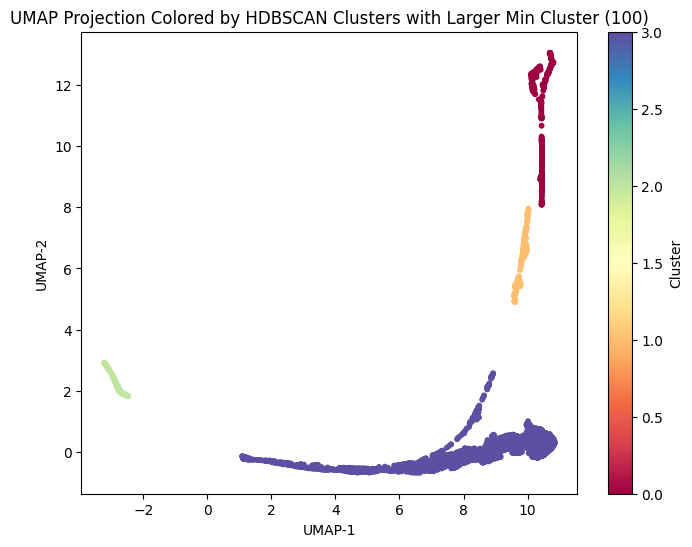

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels, cmap='Spectral', s=10)
plt.title('UMAP Projection Colored by HDBSCAN Clusters with Larger Min Cluster (100)')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.colorbar(label='Cluster')
plt.savefig("../outputs/umap_hdbscan_clusters_v2.png", dpi=300, bbox_inches='tight')
plt.show()

In [21]:
df.head(2)

,PatientID,PrimarySite_lower,SmokingStatus,Surgery,days_diagnosis_to_adv,age,ecog_newly_gte2,bmi_index,percent_change_weight,hypotension,...,neutrophil_min,lymphocyte,lymphocyte_max,lymphocyte_min,stage_0_III,stage_IV,pdl1,fgfr,ecog_2+,cluster
0,F0016E985D839,0,1,1,0.0,80,0,20.557003,0.433996,0,...,3.3,1.6,2.4,1.6,0,1,0,0,1,3
1,F001E5D4C6FA0,1,1,1,274.0,77,0,26.080805,-0.980341,0,...,4.8,2.4,2.9,2.4,0,0,0,0,0,3


In [22]:
df.to_csv('../outputs/df_with_clusters_v2.csv', index = False)
# Save dtypes
df.dtypes.apply(lambda x: x.name).to_csv('../outputs/df_clusters_v2_dtypes.csv')